# Forecast Churn of Clients - Telecom Operator Interconnect

## Proposed Work Plan

In the telecom project, where the objective is to develop a model to predict whether a user will leave the service, the following steps are to be undertaken:

1. Data Preprocessing:
- Data Cleaning: Handle any inconsistencies, such as duplicate records or erroneous values.
- Handling Missing Values: Impute or remove missing data as necessary to ensure data integrity.
- Feature Engineering: Create new features or modify existing ones to enhance model performance.
- Encoding Categorical Variables: Convert categorical data into a numerical format using techniques such as one-hot encoding.
- Normalization/Scaling: Standardize numerical features to ensure they contribute equally to the model.

2. Exploratory Data Analysis (EDA):

- Descriptive Statistics: Summarize the data to understand its distribution and characteristics.
- Visualization: Use charts and graphs to identify patterns, correlations, and outliers.

3. Data Splitting:
- Divide the dataset into training and testing subsets to evaluate model performance effectively.

4. Model Selection:

- Choose Algorithms: Select appropriate machine learning algorithms for classification, such as Logistic Regression, Random Forest, or Gradient Boosting.
- Training: Train the model on the training subset using the selected algorithms.

5. Model Evaluation:

- Performance Metrics: Evaluate the model using metrics such as Accuracy, Precision, Recall, and AUC-ROC to measure its effectiveness.
- Validation: Use cross-validation techniques to assess the model’s performance and generalizability.


6. Reporting and Documentation:

- Results: Summarize the model's performance and findings.
- Documentation: Provide comprehensive documentation on the model, including its features, performance metrics, and deployment process.

## Intro

The telecom operator Interconnect aims to forecast client churn to offer promotional codes and special plan options to users identified as likely to leave. The marketing team has gathered personal data on their clientele, including details about plans and contracts. In this project, we will develop various machine learning models to predict which customers are likely to stay or leave. We will evaluate these models using AUC-ROC and accuracy metrics, with the 'Endate' column serving as the target feature.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
contract_data = pd.read_csv('/Users/monte/Downloads/final_provider/contract.csv')
internet_data = pd.read_csv('/Users/monte/Downloads/final_provider/internet.csv')
personal_data = pd.read_csv('/Users/monte/Downloads/final_provider/personal.csv')
phone_data = pd.read_csv('/Users/monte/Downloads/final_provider/phone.csv')

First, we need to import the Intercom datasets into the Jupyter notebooks using the Pandas library. The datasets to be imported include phone data, contract data, internet data, and personal data.

### Merging Data

In [3]:
contract_internet = pd.merge(contract_data, internet_data, on='customerID', how='left')
personal_phone = pd.merge(personal_data, phone_data, on='customerID', how='left')
customer_data = pd.merge(contract_internet, personal_phone, on='customerID', how='left')

After reviewing and analyzing all datasets, we proceeded with the integration process by merging them into a unified dataset. The merge was performed based on the "CustomerID" column, which is a common key across all datasets. This approach ensures that customer information is consistently aligned across the various data sources. We used the left merge because it returns all rows from the left DataFrame and the matched rows from the right DataFrame, that way we do not miss any customers since some ID’s may not exist in certain tables. The new dataset was merged into a new dataset named "customer_data". 

### Renaming Columns

In [4]:
customer_data.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines'],
      dtype='object')

In [5]:
customer_data = customer_data.rename(columns={
    'customerID': 'customer_id',
    'BeginDate': 'begin_date',
    'EndDate': 'end_date',
    'Type': 'type',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'MonthlyCharges': 'monthly_charges',
    'TotalCharges': 'total_charges',
    'InternetService': 'internet_service',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': "streaming_tv",
    'StreamingMovies': 'streaming_movies',
    'gender': "gender",
    'SeniorCitizen': "senior_citizen",
    'Partner': 'partner',
    'Dependents': 'dependents',
    'MultipleLines': 'multiple_lines'
})

In [6]:
customer_data.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines'],
      dtype='object')

It is considered good practice to standardize column names by replacing spaces with underscores and converting all names to lowercase. This approach enhances readability and ensures consistency across datasets.

### Checking for Duplicated and Missing Values

In [7]:
duplicated_rows = customer_data.duplicated().sum()
print(f"""
There are {duplicated_rows} duplicated rows in this unified dataset.
""")


There are 0 duplicated rows in this unified dataset.



### Checking for missing values

In [8]:
customer_data.isna().sum()

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
gender                  0
senior_citizen          0
partner                 0
dependents              0
multiple_lines        682
dtype: int64

After checking for missing values in the columns, you can see that various features have missing data. We can treat these missing cases as that customer not signing up for the specific service, since the features with missing values are services offered by Telecom Operator Interconnect

In [9]:
customer_data[['internet_service', 'online_security', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']] = customer_data[['internet_service', 'online_security', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']].fillna("No")

In [10]:
customer_data.isna().sum()

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
internet_service        0
online_security         0
online_backup        1526
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
gender                  0
senior_citizen          0
partner                 0
dependents              0
multiple_lines          0
dtype: int64

After filling in all the missing values with the value "No", we have established that the customers with missing values did not sign up for that specific service, therefore, we filled it in with the Value "No'.

### Converting categorical data to numerical

In [11]:
customer_data['total_charges'] = pd.to_numeric(customer_data['total_charges'], errors='coerce')
customer_data['total_charges'].isna().sum()

11

In [12]:
customer_data[customer_data['total_charges'].isna()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,DSL,Yes,No,Yes,Yes,Yes,No,Female,0,Yes,Yes,No
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN,No,No,NaN,No,No,No,No,Male,0,No,Yes,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN,DSL,Yes,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN,No,No,NaN,No,No,No,No,Male,0,Yes,Yes,Yes
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN,DSL,Yes,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes,No
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN,No,No,NaN,No,No,No,No,Male,0,Yes,Yes,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN,No,No,NaN,No,No,No,No,Male,0,Yes,Yes,Yes
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN,No,No,NaN,No,No,No,No,Female,0,Yes,Yes,No
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN,No,No,NaN,No,No,No,No,Male,0,Yes,Yes,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN,DSL,No,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes,Yes


The missing values in total_charges pertain to a very small portion of the dataset. Based on our assessment, removing these rows will not significantly impact the overall quality or integrity of the dataset. Since the number of affected rows is minimal, their exclusion is unlikely to affect model performance or lead to significant loss of information.

Therefore, we propose dropping these rows with missing total_charges values, as doing so will streamline the dataset without compromising the reliability of our analysis or model. This decision ensures that we maintain a clean and focused dataset while adhering to best practices in data preparation.

In [13]:
customer_data = customer_data.dropna(subset=['total_charges'])
customer_data['total_charges'].isna().sum()

0

### Feature Engineering

In [14]:
customer_data = customer_data.drop(['customer_id', 'begin_date', 'type', 'paperless_billing', 'payment_method', 'gender', 'partner', 'senior_citizen', 'dependents'], axis=1)

After a thorough analysis of the columns in our DataFrame, we identified and removed certain columns that were deemed unnecessary for the development of our machine learning model. This step was taken to streamline the dataset and focus on features that contribute meaningfully to the model's predictive performance.

In [15]:
customer_data['churn'] = customer_data['end_date'].replace("No", 0)

customer_data['churn'] = customer_data['churn'].replace({
    '2019-12-01 00:00:00': 1,
    '2019-11-01 00:00:00': 1,
    '2019-10-01 00:00:00': 1, 
    '2020-01-01 00:00:00': 1
})

customer_data['churn'].value_counts()

churn
0    5163
1    1869
Name: count, dtype: int64

In [16]:
customer_data = customer_data.drop(['end_date'], axis=1)

In [17]:
customer_data['internet_service'] = customer_data['internet_service'].replace({
    'DSL': 1,
    'Fiber optic': 1,
    'No': 0
})

customer_data['internet_service'].value_counts()

internet_service
1    5512
0    1520
Name: count, dtype: int64

In [18]:
customer_data['online_backup'] = customer_data['online_backup'].fillna("No")
customer_data['online_backup'].isna().sum()

0

After removing the features that were identified as unnecessary, we addressed the missing values in the remaining features by filling them with 'No', indicating that those customers did not have the corresponding service. This step ensures the completeness of the dataset while maintaining the integrity of the information.

### One-hot Encoding

In [19]:
encoded_data = pd.get_dummies(customer_data, columns=['online_security', 'online_backup', 'device_protection', 'tech_support',
                                                     'streaming_tv', 'streaming_movies', 'multiple_lines'])



In [20]:
encoded_data = encoded_data.drop(['online_security_No', 'online_backup_No', 'device_protection_No',
                                 'tech_support_No', 'tech_support_No', 'streaming_tv_No',
                                 'streaming_movies_No', 'multiple_lines_No'], axis=1)

In this step of the project, we used one-hot encoding using the get_dummies() function to convert our features from categorical to numerical values using 0 for No and 1 for Yes. Also, we deleted collinear features.

### Converting New Features to Numerical From Bool

In [21]:
for column in encoded_data.columns:
    if encoded_data[column].dtype == 'bool':
        encoded_data[column] = encoded_data[column].astype(int)

In [22]:
encoded_data

,monthly_charges,total_charges,internet_service,churn,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes
0,29.85,29.85,1,0,0,1,0,0,0,0,0
1,56.95,1889.50,1,0,1,0,1,0,0,0,0
2,53.85,108.15,1,1,1,1,0,0,0,0,0
3,42.30,1840.75,1,0,1,0,1,1,0,0,0
4,70.70,151.65,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,1,0,1,0,1,1,1,1,1
7039,103.20,7362.90,1,0,0,1,1,0,1,1,1
7040,29.60,346.45,1,0,1,0,0,0,0,0,0
7041,74.40,306.60,1,1,0,0,0,0,0,0,1


After applying the get_dummies function, the resulting features were initially in boolean format. To prepare these features for use in our machine learning model, we employed a for loop to convert the boolean values into numerical values, ensuring compatibility and optimal performance of the model.

## Exploratory Data Analysis (EDA):

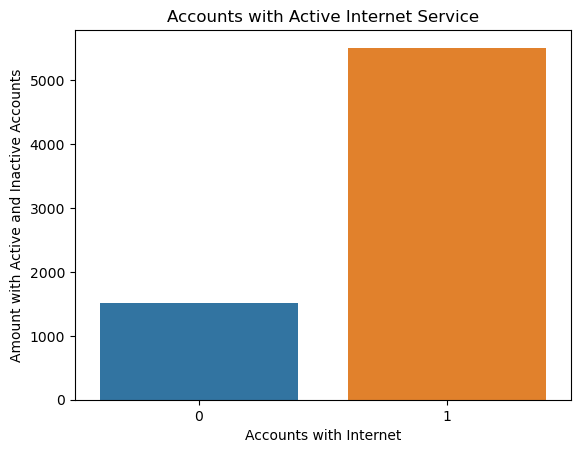

In [23]:
sns.countplot(x='internet_service', data=encoded_data)
plt.title('Accounts with Active Internet Service')
plt.xlabel('Accounts with Internet')
plt.ylabel('Amount with Active and Inactive Accounts')
plt.show()

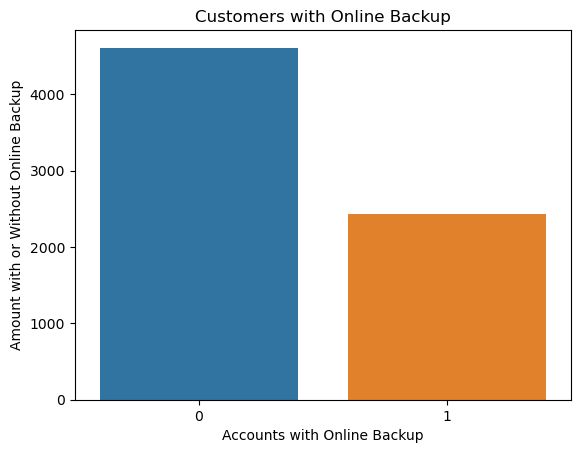

In [24]:
sns.countplot(x='online_backup_Yes', data=encoded_data)
plt.title('Customers with Online Backup')
plt.xlabel('Accounts with Online Backup')
plt.ylabel('Amount with or Without Online Backup')
plt.show()

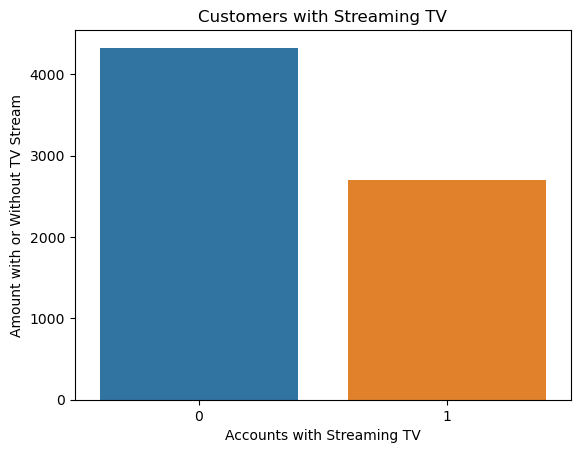

In [25]:
sns.countplot(x='streaming_tv_Yes', data=encoded_data)
plt.title('Customers with Streaming TV')
plt.xlabel('Accounts with Streaming TV')
plt.ylabel('Amount with or Without TV Stream')
plt.show()

Upon examining the count plots for the columns 'Streaming TV,' 'Online Backup,' and 'Internet Service,' it is evident that the dataset exhibits imbalances. Specifically, the majority of customers have internet service, most do not utilize streaming TV, and a significant proportion do not have online backup services. These imbalances highlight the need for appropriate handling strategies to ensure that these features contribute effectively to the modeling process

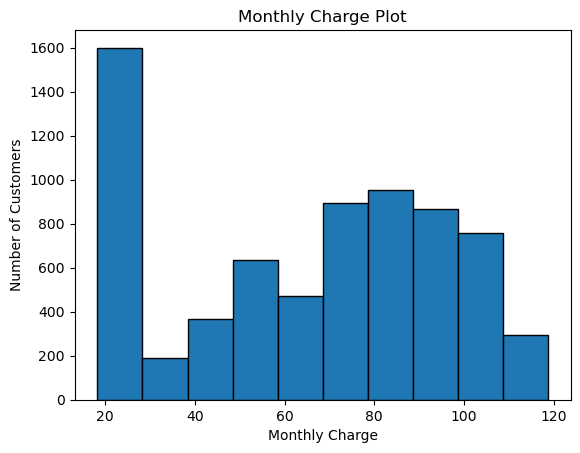

In [26]:
encoded_data['monthly_charges'].plot(
kind='hist', edgecolor='black')
plt.title("Monthly Charge Plot")
plt.ylabel("Number of Customers")
plt.xlabel("Monthly Charge")
plt.show()

The histogram is right-skewed, meaning there are a few customers with very high monthly charges, while the majority of customers have relatively low monthly charges. This indicates that a small number of customers contribute significantly to the overall revenue.

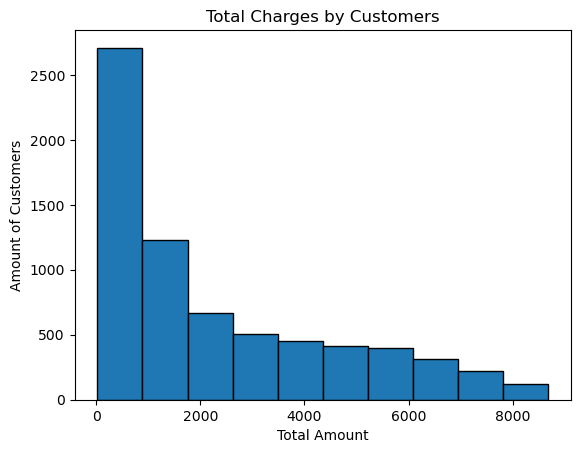

In [27]:
encoded_data['total_charges'].plot(
kind='hist', edgecolor='black')
plt.title("Total Charges by Customers")
plt.ylabel("Amount of Customers")
plt.xlabel("Total Amount")
plt.show()

The histogram is right-skewed, meaning there are a few customers with very high total charges, while the majority of customers have relatively low total charges. This indicates that a small number of customers contribute significantly to the overall revenue.

### Splitting the Data

In [28]:
features = encoded_data.drop(['churn'], axis=1)
target = encoded_data['churn']

X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=.3, random_state = 12345)

### Oversampling using SMOTE

Due to the imbalance present in our dataset, we will apply Synthetic Minority Over-sampling Technique (SMOTE) to address this issue. SMOTE will allow us to generate synthetic samples for the minority class, thereby enhancing the balance of our data and improving the performance of our predictive models.

In [29]:
smote = SMOTE(random_state=12345)
features_resampled, target_resampled = smote.fit_resample(X_train, y_train)

print(features_resampled.shape)
print(target_resampled.shape)

(7260, 10)
(7260,)


## Training Different Models

### Logistic Regression 

In [30]:
logistic = LogisticRegression(solver='liblinear', max_iter=100, class_weight='balanced', random_state=12345)
logistic.fit(features_resampled, target_resampled)
y_prediction_logistic = logistic.predict(X_valid)
roc_auc_logistic = roc_auc_score(y_valid, y_prediction_logistic)
accuracy_logistic = accuracy_score(y_valid, y_prediction_logistic)
print(f"""
Accuracy Score: {accuracy_logistic:.2f}
""")
print(f"""
Roc_Auc_Score Logistic Regression: {roc_auc_logistic:.2f}
""")


Accuracy Score: 0.75


Roc_Auc_Score Logistic Regression: 0.72



### Gradient Boost Classifier

In [31]:
gradient_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=2, random_state=12345)
gradient_boost.fit(features_resampled, target_resampled)
y_pred_prob_gradient = gradient_boost.predict_proba(X_valid)[:, 1]
roc_auc_test = roc_auc_score(y_valid, y_pred_prob_gradient)
accuracy_test = accuracy_score(y_valid, gradient_boost.predict(X_valid))

print(f"""
Test Set Accuracy Score: {accuracy_test:.2f}
Test Set Gradient Boost ROC AUC Score: {roc_auc_test:.2f}
""")


Test Set Accuracy Score: 0.77
Test Set Gradient Boost ROC AUC Score: 0.82



### Random Forest Classifier

In [32]:
rf_model = RandomForestClassifier(random_state=12345)
rf_model.fit(features_resampled, target_resampled)
y_pred_rf = rf_model.predict(X_valid)
roc_auc_rf = roc_auc_score(y_valid, y_pred_rf)
accuracy_rf = accuracy_score(y_pred_rf, y_valid)
print(f"""
Accuracy Score: {accuracy_rf:.2f}
""")
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.2f}")



Accuracy Score: 0.76

Random Forest ROC-AUC Score: 0.70


### Cross Validation

In [33]:
cv_scores = cross_val_score(gradient_boost, features_resampled, target_resampled, cv=5, scoring='roc_auc')

print(f"""
Cross-Validation ROC AUC Scores: {cv_scores}
Mean Cross-Validation ROC AUC Score For Gradient Boost: {cv_scores.mean():.2f}
""")


Cross-Validation ROC AUC Scores: [0.80894406 0.83682524 0.92785955 0.9316645  0.93326864]
Mean Cross-Validation ROC AUC Score For Gradient Boost: 0.89



## Conclusion

Cross-Validation ROC AUC Scores: The scores from cross-validation indicate that the model performs well across different subsets of the training data, with the mean ROC AUC score being 0.89. This suggests that, on average, the model has good discriminative ability across multiple folds of training data.  

Test Set ROC AUC Score: The ROC AUC score of 0.82 on the test set is slightly lower than the mean cross-validation score. This difference is expected and reflects the model's performance on a new, unseen dataset. A slight decrease is normal due to the inherent variability between the training data and the test data.

## Report

Upon completing our project, we undertook a series of systematic steps to ensure the robustness and accuracy of our findings.

#### Data Processing:

- Duplicate and Missing Values: Initially, we checked for duplicate entries and found none. After merging the datasets on the 'customer id' column, we identified missing values in several columns. These missing values corresponded to distinct services that customers had not subscribed to. We filled these missing values as if the customers did not have those services.

#### Feature Engineering:

- One-Hot Encoding: We employed one-hot encoding to transform categorical features into numerical format.
- Collinearity Management: To prevent data leakage, we dropped collinear features.
- Numerical Conversion: We converted all retained features into numerical data suitable for machine learning models.

#### Handling Imbalanced Data:

- Recognizing the imbalance in our dataset, we applied scaling and upsampling techniques to ensure that each feature contributed equally to the model.

#### Exploratory Data Analysis (EDA):

- We conducted an EDA on the merged and encoded dataset, utilizing various plots to identify patterns and correlations among the customers.

#### Data Splitting:

- We split the dataset into training and testing subsets using the train_test_split function with a test size of 30%. This step was crucial for evaluating model performance effectively.

#### Model Creation and Evaluation:

- Given that our task was a classification problem, we developed multiple models, including Logistic Regression, Gradient Boosting Classifier, and Random Forest Classifier.
- Among these, the Gradient Boosting Classifier emerged as the best model, achieving a ROC AUC score of 0.82.

#### Cross-Validation:

- To gain a more reliable estimate of the model’s performance on unseen data, we applied cross-validation to the Gradient Boosting Classifier. This step helped us better understand the model’s generalizability to an independent dataset.

By following these steps meticulously, we ensured that our approach was thorough and our results were reliable. The Gradient Boosting Classifier, validated through cross-validation, demonstrated a robust performance, making it the best choice for our classification task.